In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [3]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
lfw.data.shape

(1140, 1850)

In [5]:
lfw.images.shape

(1140, 50, 37)

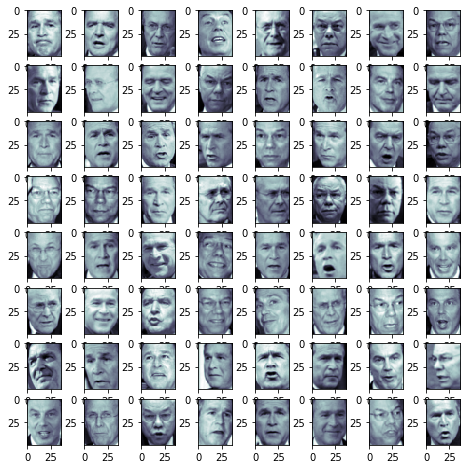

In [6]:
fig=plt.figure(figsize=(8,8))
#im just plotting the first 64 images instead of whole 400 image dataset just for simplicity

for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()

In [7]:
x=lfw.data
y=lfw.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [8]:
pca=PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
k = 0
total = 0
while total <.99:
    total = total + pca.explained_variance_ratio_[k]  #adding variance ratio 
    k = k + 1
k

316

In [10]:
pca_lfw=PCA(n_components=k,whiten=True)
transformed_data=pca_lfw.fit_transform(x_train)
transformed_data.shape

(855, 316)

In [11]:
x_approx=pca_lfw.inverse_transform(transformed_data)
x_approx_images=x_approx.reshape((855,50,37))

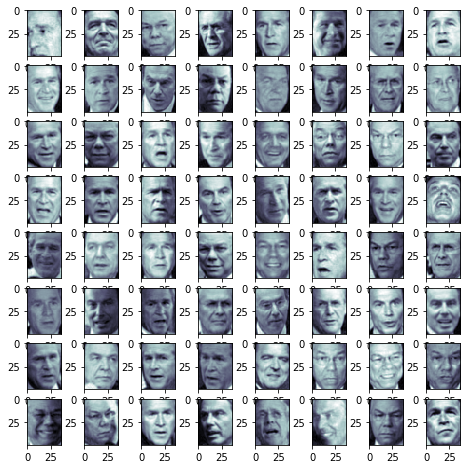

In [12]:
fig=plt.figure(figsize=(8,8))
#im just plotting the first 64 images instead of whole 400 image dataset just for simplicity

for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

In [13]:
eigen_vectors=pca.components_
eigen_vectors.shape

(855, 1850)

In [14]:
eigen_faces=eigen_vectors.reshape((855,50,37))

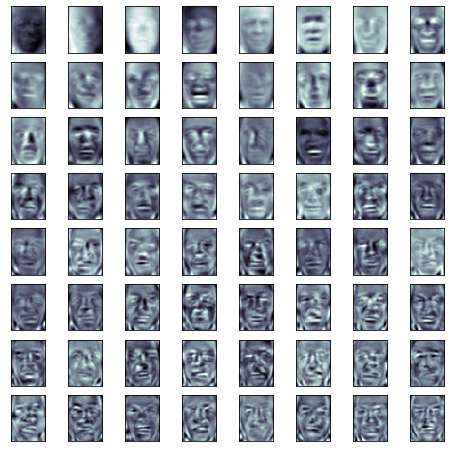

In [15]:
fig=plt.figure(figsize=(8,8))
#im just plotting the first 64 images instead of whole 400 image dataset just for simplicity

for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(eigen_faces[i],cmap=plt.cm.bone)
plt.show()

In [16]:
x_train_pca=transformed_data
x_test_pca=pca_lfw.transform(x_test)

In [17]:
#first we classify without using PCA

rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train,y_train)
end=time.time()
print(end-start)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.405810832977295
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        61
           1       0.89      0.22      0.36        36
           2       0.60      0.99      0.75       122
           3       1.00      0.13      0.23        31
           4       1.00      0.31      0.48        35

    accuracy                           0.67       285
   macro avg       0.85      0.49      0.52       285
weighted avg       0.77      0.67      0.62       285

[[ 47   0  14   0   0]
 [  7   8  21   0   0]
 [  1   0 121   0   0]
 [  2   1  24   4   0]
 [  3   0  21   0  11]]


In [18]:
#then we classify using PCA

rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train_pca,y_train)
end=time.time()
print(end-start)
y_pred=rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7915894985198975
              precision    recall  f1-score   support

           0       0.63      0.20      0.30        61
           1       0.00      0.00      0.00        36
           2       0.46      0.99      0.63       122
           3       0.00      0.00      0.00        31
           4       1.00      0.03      0.06        35

    accuracy                           0.47       285
   macro avg       0.42      0.24      0.20       285
weighted avg       0.45      0.47      0.34       285

[[ 12   0  49   0   0]
 [  5   0  31   0   0]
 [  1   0 121   0   0]
 [  1   0  30   0   0]
 [  0   0  34   0   1]]


In [ ]:
# we can work around a bit to use different classifiers to get the best score 